<a href="https://colab.research.google.com/github/paulaleite/aprendizagemDeMaquinaa2022/blob/main/ClassificacaoDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Dados
## *Paula Torales Leite*
### Case: Base Fraud Detection

Usando a base de Fraud Detection, devo apresentar um processo completo de classificação de dados, envolvendo desde a fase de pipeline de dados, até a apresentação dos resultados pela matriz de confusão.

As bibliotecas utilizadas serão:

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import tree

Acessando os dados

In [3]:
path_data = '/content/creditcard.csv'
df = pd.read_csv(path_data)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploração dos Dados

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Retirando dados duplicados
Além disso, foi criada outro variável para não utilizar os dados originais.

In [6]:
df_fraud = df.copy()

In [7]:
df_fraud.duplicated().sum()

1081

In [8]:
df_fraud = df_fraud.drop_duplicates()

In [9]:
df_fraud.duplicated().sum()

0

In [10]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Análise das Classes
Os próximos gráficos apresentam a distribuição dos dados nas classes de fraude e não fraude.
Isso foi feito com um gráfico de barras e de pizza.

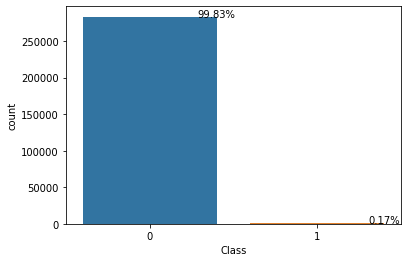

In [11]:
ax = sb.countplot(x='Class',data=df_fraud)
total = float(len(df_fraud))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

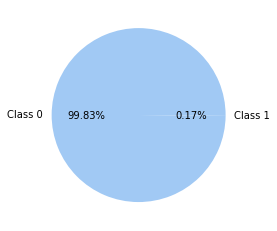

In [12]:
data = df_fraud['Class'].value_counts(normalize=True) * 100

labels = ['Class 0', 'Class 1']

colors = sb.color_palette('pastel')[0:1]

plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

## Boxplots

Foram construídos três gráficos do tipo boxplot, um avaliar a relaçãoentre a classe com o tempo, o segundo a classe com a quantidade e terceiro apresenta a classe com uma das variáveis disponíveis.

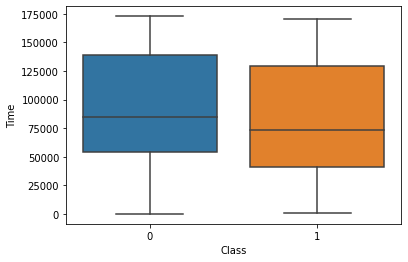

In [13]:
sb.boxplot(data=df_fraud, x="Class", y="Time")

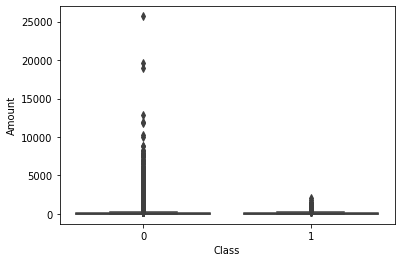

In [14]:
sb.boxplot(data=df_fraud, x="Class", y="Amount")

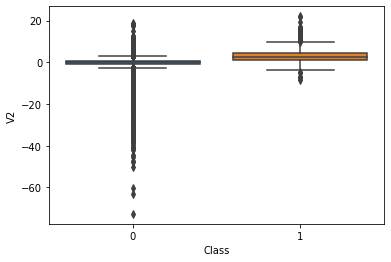

In [15]:
sb.boxplot(data=df_fraud, x="Class", y="V2")

## Árvore de Decisão

In [16]:
X = df_fraud.drop(['Class'], axis = 1)
y = df_fraud[['Class']]

Divisão entre treinamento e teste

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21,stratify=y)

In [18]:
dt = DecisionTreeClassifier(criterion='gini',random_state=21)
dt.fit(X_train,y_train)
y_pred =dt.predict(X_test)
average_precision_score(y_test,y_pred)

0.54980574338119

In [19]:
X = df_fraud.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V19       V20  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.40399

In [20]:
y = df_fraud.iloc[:,[30]]
print(y)

        Class
0           0
1           0
2           0
3           0
4           0
...       ...
284802      0
284803      0
284804      0
284805      0
284806      0

[283726 rows x 1 columns]


In [21]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [22]:
one_hot_data = pd.get_dummies(X[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']], drop_first=True)

In [23]:
clf = clf.fit(one_hot_data, y)

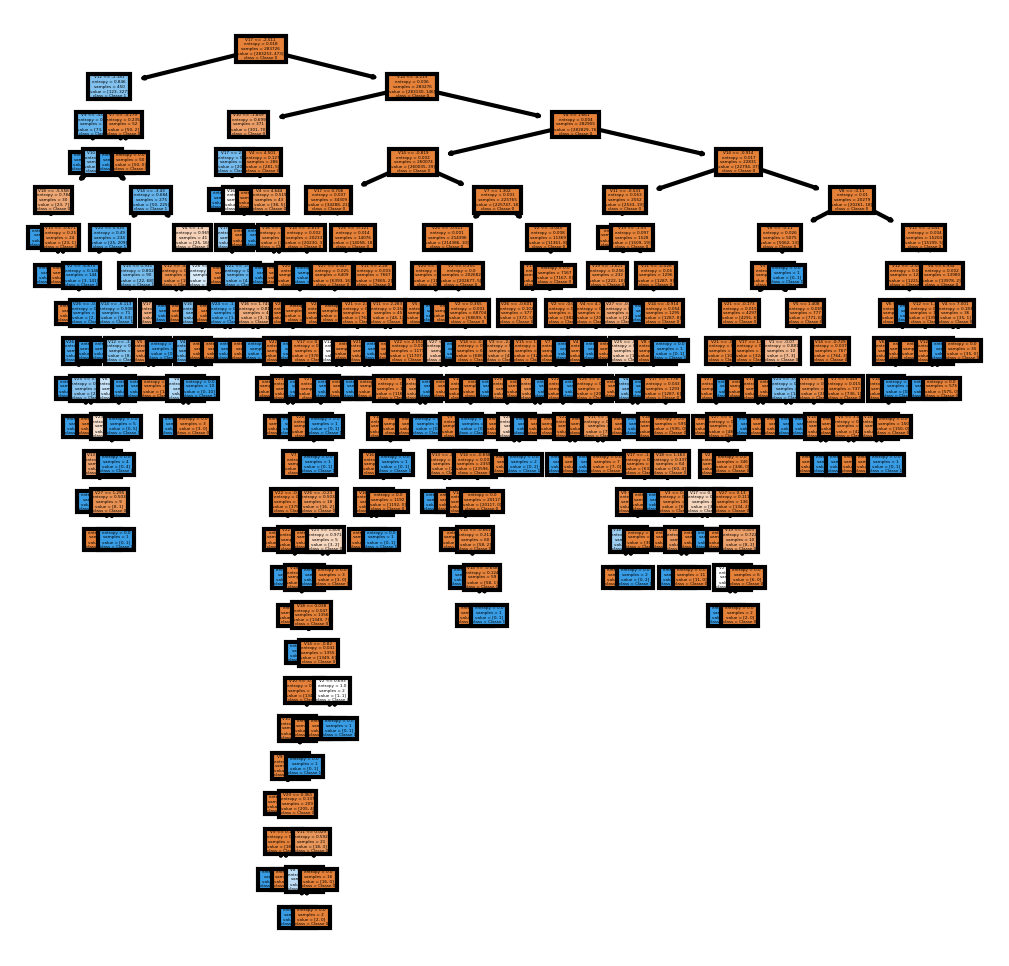

In [24]:
fn=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
cn=['Classe 0', 'Classe 1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

Text(0.5, 1.0, 'Feature Importance')

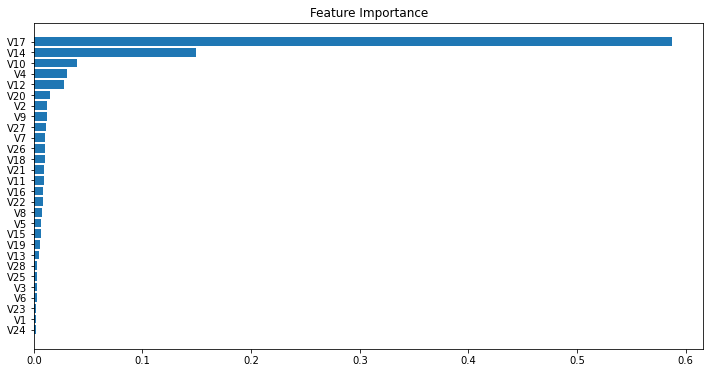

In [25]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])[sorted_idx])
plt.title('Feature Importance')

## Validação Cruzada com Árvore de Decisão

In [26]:
test = df_fraud.iloc[0:1,1:29]
test = pd.DataFrame(test)
print(test)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9       V10  ...       V19       V20       V21       V22  \
0  0.098698  0.363787  0.090794  ...  0.403993  0.251412 -0.018307  0.277838   

        V23       V24       V25       V26       V27       V28  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  

[1 rows x 28 columns]


In [27]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')

model.fit(X,y)

predicted= model.predict(test)
print(predicted)

[0]


In [28]:
df_fraud.iloc[0:1,1:29]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053


In [29]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')

cv_scores = cross_val_score(model, X, y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.99827301 0.99938321 0.99652833 0.99894264 0.99911887]
cv_scores mean:0.9984492086597726


## KNN com Validação Cruzada

In [30]:
test = df_fraud.iloc[0:1,1:29]
test = pd.DataFrame(test)
print(test)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9       V10  ...       V19       V20       V21       V22  \
0  0.098698  0.363787  0.090794  ...  0.403993  0.251412 -0.018307  0.277838   

        V23       V24       V25       V26       V27       V28  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  

[1 rows x 28 columns]


In [31]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X,y)

predicted= model.predict(test)
print(predicted)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
model

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_cv = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn_cv, X, y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.99906601 0.99952419 0.99874879 0.99948894 0.99941845]
cv_scores mean:0.9992492763555786


In [ ]:
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 5)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
knn_gscv.best_params_

In [ ]:
knn_gscv.best_score_